In [1]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow 
import autokeras as ak

In [2]:
import tensorflow

In [3]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test/*.txt"))))

In [4]:
X=df.drop(columns=['SOC', 'SOC_est'])
y = df.SOC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Coefficients: 
 [ 2.40841303e-02  1.42186083e+02 -2.89936141e-01 -1.95643447e-01]
Mean squared error: 82.30
Coefficient of determination: 0.84


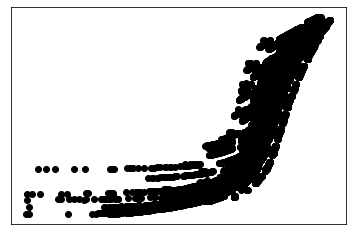

In [5]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['voltage'], y_test,  color='black')
#plt.plot(X_test['voltage'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
X_test

,time,voltage,curr_density,temp
734,367.0,3.012058,-29.50,288.283766
335,167.5,3.709120,-14.75,311.891725
284,142.0,3.457124,-14.75,311.331105
140,70.0,3.701728,-14.75,265.802300
76,38.0,3.784274,-29.50,323.397874
...,...,...,...,...
48,24.0,3.635964,-29.50,278.390773
717,358.5,3.806399,-29.50,288.186784
68,34.0,3.871705,-29.50,308.301898
736,368.0,3.555800,-29.50,302.251302


In [7]:
y_test

734     2.234668
335    28.231656
284     7.589079
140    30.598304
76     51.934713
         ...    
48     21.327187
717    65.472967
68     70.046848
736    15.206656
800    26.309575
Name: SOC, Length: 29510, dtype: float64

In [8]:
import autokeras

In [15]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=30, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=30)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

Trial 30 Complete [00h 03m 11s]
val_loss: 4.380800724029541

Best val_loss So Far: 4.380800724029541
Total elapsed time: 00h 53m 39s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
2152/2152 [==============================] - 5s 2ms/step - loss: 347.1745 - mean_squared_error: 347.1745: 2s - loss: 754.5793 -  - E - ETA: 0s - loss: 363.6545 - mean_squared_error
Epoch 2/30
2152/2152 [==============================] - 5s 2ms/step - loss: 17.1344 - mean_squared_error: 17.1344
Epoch 3/30
2152/2152 [==============================] - 4s 2ms/step - loss: 24.4476 - mean_squared_error: 24.4476: 1s - loss: 18.9887 - mean_squared_error: 18. - ETA: 1s - loss: 18.6883 - m - ETA: 0s - loss: 25.2778 - mean_squa
Epoch 4/30
2152/2152 [==============================] - 5s 2ms/step - loss: 12.3037 - mean_squared_error: 12.3037: 0s - loss: 11.0203 - mean_squared_error: 11.02 - ETA: 0s - loss: 10.9917 - mean_squared_error:
Epoch 5/30
2152/2152 [==============================] - 5s 3ms/step - loss: 9.5221 - 

In [16]:
model = reg.export_model()

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [23]:
y_test[0:10]

734     2.234668
335    28.231656
284     7.589079
140    30.598304
76     51.934713
595    25.183032
850    65.397638
443    34.313599
901    27.488913
518    49.262339
Name: SOC, dtype: float64

In [22]:
print(predicted_y[0:10])

[[ 2.3625016]
 [27.943493 ]
 [ 7.3220615]
 [31.623951 ]
 [53.47083  ]
 [24.64329  ]
 [66.385056 ]
 [35.234634 ]
 [26.739157 ]
 [50.50332  ]]


In [24]:
print(type(model))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [25]:
model.save("model_autokeras", save_format="tf")

INFO:tensorflow:Assets written to: model_autokeras/assets


In [27]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [29]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [30]:
predicted_y = loaded_model.predict(tf.expand_dims(X_test, -1))

<IPython.core.display.Javascript object>

In [31]:
predicted_y

array([[ 2.3625016],
       [27.943493 ],
       [ 7.3220615],
       ...,
       [71.26073  ],
       [15.031337 ],
       [24.264    ]], dtype=float32)